In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')


In [ ]:
df = pd.read_csv('Data_for_UCI_named.csv')

In [3]:
df.head(10)

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [4]:
df.drop(columns='stab', inplace=True)

In [5]:
X = df.drop("stabf", axis = 1)
y = df["stabf"]           

In [6]:
from sklearn.model_selection import train_test_split 
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 1)

In [7]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler() 
normalised_train_df = scaler.fit_transform(x_train) 
normalised_train_df = pd.DataFrame(normalised_train_df, columns=x_train.columns) 

normalised_test_df = scaler.transform(x_test) 
normalised_test_df = pd.DataFrame(normalised_test_df, columns=x_test.columns)

In [8]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state = 1)
model.fit(normalised_train_df, y_train)

RandomForestClassifier(random_state=1)

In [9]:
prediction = model.predict(normalised_test_df)

In [10]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(prediction, y_test) 
round(accuracy,4)

0.929

In [11]:
import lightgbm as lgbm
model = lgbm.LGBMClassifier(random_state=1)
model.fit(normalised_train_df, y_train)

LGBMClassifier(random_state=1)

In [12]:
new_prediction = model.predict(normalised_test_df)

In [13]:
acc = accuracy_score(y_test, new_prediction)
round(accuracy, 4)

0.929

In [14]:
from sklearn.ensemble import ExtraTreesClassifier
extra_trees = ExtraTreesClassifier(random_state=1)
extra_trees.fit(normalised_train_df, y_train)
feature_importance = extra_trees.feature_importances_

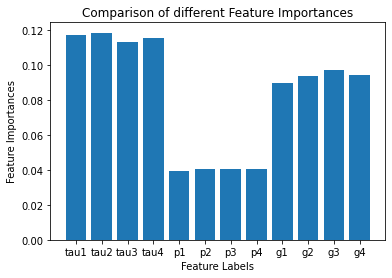

In [15]:
# Plotting a Bar Graph to compare the models
plt.bar(normalised_train_df.columns, feature_importance)
plt.xlabel('Feature Labels')
plt.ylabel('Feature Importances')
plt.title('Comparison of different Feature Importances')
plt.show()

In [17]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier(random_state = 1)
xgb_model.fit(normalised_train_df, y_train)
xgb_predicted = xgb_model.predict(normalised_test_df)

In [18]:
xgb_accuracy = accuracy_score(y_test, xgb_predicted)
round(xgb_accuracy, 4)

0.9195

In [19]:
from sklearn.model_selection import RandomizedSearchCV
parameters = { 'n_estimators':[50, 100, 300, 500, 1000],
         'min_samples_leaf':[1, 2, 4, 6, 8],
         'max_features':['sqrt', 'log2', 'auto', None],
         'min_samples_split':[2, 3, 5, 7, 9]}
to_search = RandomizedSearchCV(extra_tree, parameters, n_iter=10, scoring='accuracy', n_jobs=-1, cv=5, random_state=1, verbose=1)
result_of_search = to_search.fit(normalised_train_df, y_train)
# summarizing result
print('Best Hyperparameters: %s' % result_of_search.best_params_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters: {'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 8, 'max_features': None}


In [23]:
# confusion matrix data:
TP = 255
TN = 20
FP = 45
FN = 1380
#Calculating  Recall
Recall = TP/(TP+FN)
#Calculating Precision
Precision = TP/(TP+FP)
#Calculating F1 score
F1_Score = (2 * ((Recall*Precision)/(Recall+Precision)))

(round(F1_Score,5))

0.26357

In [24]:
extra_clf1 = ExtraTreesClassifier(random_state=1)

extra_clf1.fit(normalised_train_df, y_train)

predicted_model = extra_clf1.predict(normalised_test_df)

In [25]:
acc_new = accuracy_score(predicted_model, y_test)
print(round(acc_new,4))

0.928


In [26]:
optimum_extra_clf = ExtraTreesClassifier(n_estimators = 1000, min_samples_split = 2, min_samples_leaf = 8, max_features = None, random_state=1)
optimum_extra_clf.fit(normalised_train_df, y_train)
optimum_prediction = optimum_extra_clf.predict(normalised_test_df)

In [27]:
acc_optimal= accuracy_score(optimal_prediction, y_test)
print(round(acc_optimal,4))

0.927
